Found 1044 images belonging to 9 classes.
Found 112 images belonging to 9 classes.
Found 502 images belonging to 9 classes.


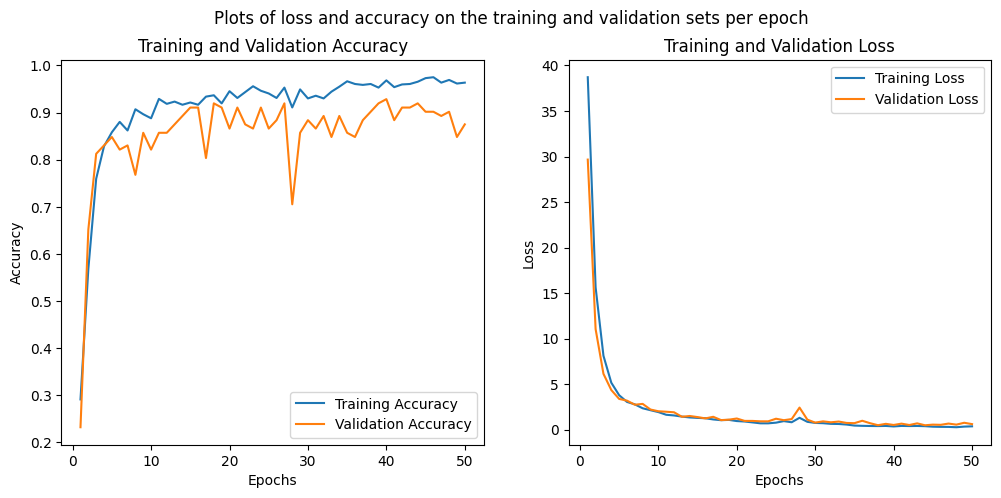

/Users/rj/Documents/462/Code/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 606ms/step
Classification Report
              precision    recall  f1-score   support

        Ajwa       1.00      1.00      1.00        53
      Galaxy       0.96      0.91      0.94        57
     Mejdool       0.67      0.98      0.79        41
     Meneifi       0.91      0.86      0.88        70
   NabtatAli       0.96      0.91      0.93        54
       Rutab       0.97      0.89      0.93        44
     Shaishe       0.96      0.87      0.91        52
      Sokari       0.87      0.99      0.92        80
      Sugaey       1.00      0.78      0.88        51

    accuracy                           0.91       502
   macro avg       0.92      0.91      0.91       502
weighted avg       0.92      0.91      0.91       502



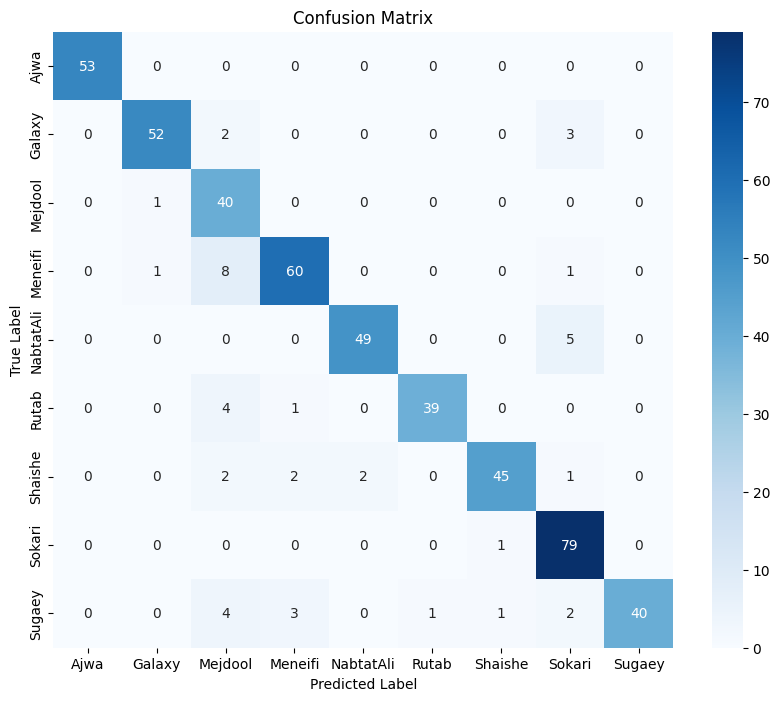

In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = r"/Users/rj/Documents/462/train"
TEST_DIR = r"/Users/rj/Documents/462/test"

IMG_WIDTH, IMG_HEIGHT = 200, 200


train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    zoom_range=0.2,
    validation_split=0.1  
)

test_data_gen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_data_gen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=32,
    subset='training'  
)

validation_generator = train_data_gen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=32,
    subset='validation'  
)

test_generator = test_data_gen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    batch_size=32,
    shuffle=False  
)

train_counter = Counter(train_generator.classes)
validation_counter = Counter(validation_generator.classes)
test_counter = Counter(test_generator.classes)

train_df = pd.DataFrame.from_dict(train_counter, orient='index', columns=['train count'])
validation_df = pd.DataFrame.from_dict(validation_counter, orient='index', columns=['validation count'])
test_df = pd.DataFrame.from_dict(test_counter, orient='index', columns=['test count'])

df = pd.concat([train_df, validation_df, test_df], axis=1)

df.index = ['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']
df.reset_index(inplace=True)
df.columns = ['type', 'train count', 'validation count', 'test count']

fig = px.histogram(df, x='type', y=['train count', 'validation count', 'test count'], barmode='group')
fig.show()




import pickle
import matplotlib.pyplot as plt

with open('modelHistory.binary', 'rb') as file:
    loaded_history = pickle.load(file)

train_accuracy = loaded_history['accuracy']
val_accuracy = loaded_history['val_accuracy']
train_loss = loaded_history['loss']
val_loss = loaded_history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Plots of loss and accuracy on the training and validation sets per epoch')
plt.show()


import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf




model = tf.keras.models.load_model('actualModel.keras')

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = test_generator.classes  

class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report")
print(class_report)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
